# Pulser Calculation Example

Following are the imports required to run this example:

In [1]:
import matplotlib.pyplot as plt  # for plotting
import numpy as np  # numpy
import qse  # import the qse
import pulser  # we just need this for R_interatomic

#### 2D square lattice

crank = 2, prank = 2
rcut is 9.756753962298905


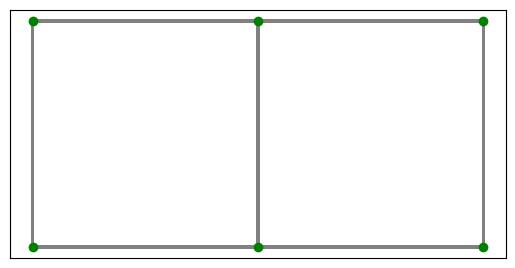

In [2]:
# Parameters in rad/µs and ns

Omega_max = 2.0 * 2 * np.pi
U = Omega_max / 2.0
delta_0 = -6 * U
delta_f = 2 * U
t_rise = 252
t_fall = 500
t_sweep = (delta_f - delta_0) / (2 * np.pi * 10) * 1000

# We extract the reference blockade radius from pulser here
R_interatomic = pulser.devices.MockDevice.rydberg_blockade_radius(U)

L1, L2 = 3, 2  # lattice size

# Now we generate the qbits object that represents 1D lattice with r0 as lattice spaceing

r0 = 0.8 * R_interatomic
# keeping r0 a bit below blockade radius keeps the nearest neighbours antiferromagnetic

q2d = qse.lattices.square(r0, L1, L2)

# we can also use qse.utils.triangularlattice, etc.
# check the qse.utils module.

q2d.draw(radius=R_interatomic)

#### Hamiltonian creation for 2D lattice

In [3]:
amplitude_afm = pulser.CompositeWaveform(
    pulser.waveforms.RampWaveform(t_rise, 0.0, Omega_max),
    pulser.waveforms.ConstantWaveform(t_sweep, Omega_max),
    pulser.waveforms.RampWaveform(t_fall, Omega_max, 0.0),
)
# up ramp, constant, downramp waveform

detuning_afm = pulser.CompositeWaveform(
    pulser.waveforms.ConstantWaveform(t_rise, delta_0),
    pulser.waveforms.RampWaveform(t_sweep, delta_0, delta_f),
    pulser.waveforms.ConstantWaveform(t_fall, delta_f),
)
# corresponding waveform for detuning

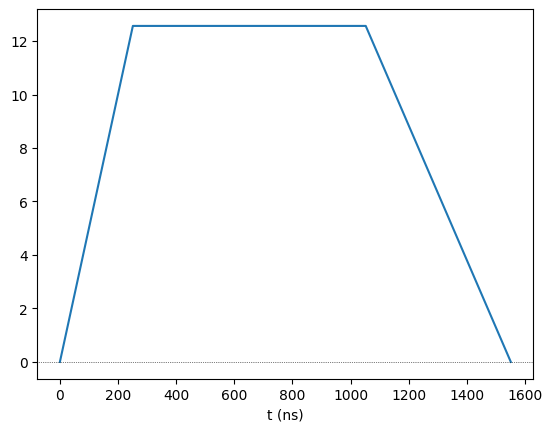

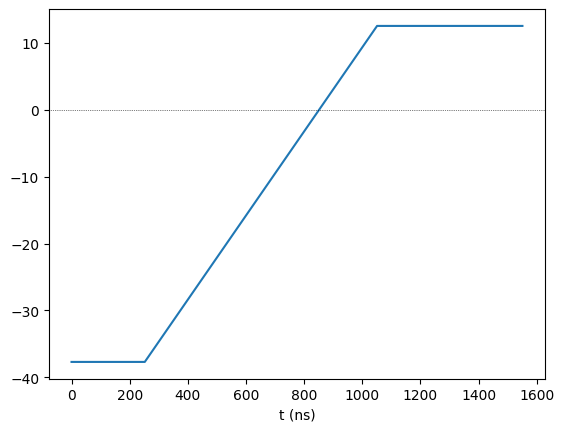

In [4]:
amplitude_afm.draw()
detuning_afm.draw()

#### Setting up the calculator

In [5]:
isinstance(amplitude_afm, pulser.waveforms.Waveform)

True

In [6]:
pcalc = qse.calc.Pulser(qbits=q2d, amplitude=amplitude_afm, detuning=detuning_afm)

#### Running the job

In [7]:
pcalc.calculate()

10.1%. Run time:   0.00s. Est. time left: 00:00:00:00
20.0%. Run time:   0.00s. Est. time left: 00:00:00:00
30.0%. Run time:   0.00s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.01s. Est. time left: 00:00:00:00
60.1%. Run time:   0.01s. Est. time left: 00:00:00:00
70.0%. Run time:   0.01s. Est. time left: 00:00:00:00
80.0%. Run time:   0.01s. Est. time left: 00:00:00:00
90.0%. Run time:   0.01s. Est. time left: 00:00:00:00
100.0%. Run time:   0.01s. Est. time left: 00:00:00:00
Total run time:   0.01s
time in compute and simulation = 0.01907515525817871 s.


In [8]:
pcalc.spins

array([[-0.00977225, -0.17867203, -0.05407258],
       [-0.00977225, -0.17867203, -0.05407258],
       [-0.04058019, -0.25082541, -0.22158193],
       [-0.04058019, -0.25082541, -0.22158193],
       [-0.00977225, -0.17867203, -0.05407258],
       [-0.00977225, -0.17867203, -0.05407258]])

In [9]:
pcalc.get_sij()

array([[ 0.99999739, -0.33000706, -0.69227483,  1.20298508,  1.12188504,
        -0.68929972],
       [-0.33000706,  0.99999739,  1.20298508, -0.69227483, -0.68929972,
         1.12188504],
       [-0.69227483,  1.20298508,  0.99999739, -0.59561159, -0.69227483,
         1.20298508],
       [ 1.20298508, -0.69227483, -0.59561159,  0.99999739,  1.20298508,
        -0.69227483],
       [ 1.12188504, -0.68929972, -0.69227483,  1.20298508,  0.99999739,
        -0.33000706],
       [-0.68929972,  1.12188504,  1.20298508, -0.69227483, -0.33000706,
         0.99999739]])

In [10]:
pcalc.structure_factor_from_sij(L1, L2, 1)

array([[[0.25846545],
        [0.24365488]],

       [[0.24192721],
        [0.22691049]],

       [[0.19740721],
        [0.18243339]]])

#### Sampling the result

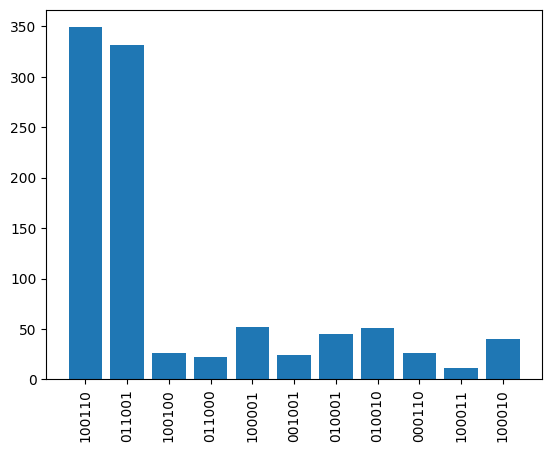

In [11]:
count = pcalc.results.sample_final_state()

most_freq = {k: v for k, v in count.items() if v > 10}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()

## Version

In [12]:
!python --version

Python 3.11.11


In [13]:
print(qse.__name__, qse.__version__)

qse 0.1.2
